# 第十章 离散因变量模型

## 10.2 二元选择模型

二元选择模型具体是指离散因变量具有两个选项或两种属性，二元离散因变量的属性往往是对立或互斥的

In [149]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
path="D:/data/Python_data/ch10/product_usage.csv"
product=pd.read_csv(path)
product.head()

,CSI,Complaint,Loyalty,Attitude
0,8,3,8,1
1,9,4,10,1
2,6,1,10,1
3,8,4,7,1
4,8,7,7,1


In [150]:
from statsmodels.formula.api import glm  #构建probit模型，选择Binomial分布簇并使用Probit链接函数
formula='Attitude~CSI+Complaint+Loyalty'
product_m=glm(formula,data=product,family=sm.families.Binomial(sm.families.links.probit)).fit()
print product_m.summary()

In [151]:
product_m.predict(pd.DataFrame({'CSI':[8],'Complaint':[4],'Loyalty':[7]}))  #求响应概率

0    0.8528
dtype: float64

In [152]:
path="D:/data/Python_data/ch10/threeg.csv"
G3=pd.read_csv(path)
G3.head()

,Gender,Age,Purchase
0,1,35,0
1,1,59,1
2,1,56,1
3,1,46,1
4,1,39,0


In [153]:
G3['Gender']=G3['Gender'].astype('category')
G3['Gender'].cat.categories=['女','男']
G3['Gender'].cat.set_categories=['女','男']

In [154]:
formula='Purchase~C(Gender)+Age'
G3_model1=glm(formula,data=G3,family=sm.families.Binomial(sm.families.links.probit)).fit()
print G3_model1.summary()  #使用glm建模

In [155]:
G3_model1.predict(pd.DataFrame({'Gender':['男','女'],'Age':[45,45]}))  #同样可以使用predict实现

0    0.688636
1    0.379574
dtype: float64

In [156]:
from statsmodels.formula.api import probit
G3_model2=probit(formula,data=G3).fit()
print G3_model2.summary2()

In [157]:
print G3_model2.get_margeff().summary()  #得到模型自变量对因变量的边际影响

### 10.2.4 BINARY LOGIT模型

二元Logit模型对隐变量随机误差项假定服从标准正态分布

In [158]:
G3_model3=glm(formula,data=G3,family=sm.families.Binomial(sm.families.links.logit)).fit()
print G3_model3.summary()    

In [159]:
G3_model3.predict(pd.DataFrame({'Gender':['男','女'],'Age':[45,45]}))

0    0.702411
1    0.360706
dtype: float64

In [160]:
from statsmodels.formula.api import logit
G3_model4=logit(formula,data=G3).fit()
print G3_model4.summary2()

In [161]:
print G3_model4.get_margeff().summary()  #使用logit得到的模型对象还可以使用get_mrgeff 方法得到模型自变量对因变量的边际影响

## 10.3 多重选择模型

多重选择模型中，不同选项或者选择结果之间的关系有两种情况：一种是各项选择是有顺序之分，另一种是选项之间没有次序或顺序之分

In [162]:
path="D:/data/Python_data/ch10/threeg_multi.csv"
G3_m=pd.read_csv(path)
G3_m.ix[[0,1,28,38,58]]

,gender,age,purchase
0,2,54,1
1,1,59,1
28,2,31,2
38,1,39,2
58,2,42,3


In [163]:
G3_m['gender']=G3_m['gender'].astype('category')
G3_m['gender'].cat.categories=['女','男']
G3_m['gender'].cat.set_categories=['女','男']
G3_m['purchase']=G3_m['purchase'].astype('category')
G3_m['purchase'].cat.categories=['不买','无所谓','买']
G3_m['purchase'].cat.set_categories=['不买','无所谓','买']

## 10.4 计数模型

分析离散计数因变量的模型即为计数模型

In [164]:
path="D:/data/Python_data/ch10/printer.csv"
printer=pd.read_csv(path)
printer.head()

,cartridge,Counts,Pages,Length
0,2,5,87.8,44.194
1,1,1,52.2,3.663
2,2,0,0.7,0.331
3,2,1,81.7,18.422
4,2,4,89.9,45.003


In [165]:
printer['cartridge']=printer['cartridge'].astype('category')
printer['cartridge'].cat.categories=['原装','兼容']
printer['cartridge'].cat.set_categories=['原装','兼容']

In [166]:
from statsmodels.formula.api import poisson
formula='Counts~C(cartridge)+Pages+Length'
printer_model=poisson(formula,data=printer).fit()
print printer_model.summary2()

In [167]:
printer_model.predict(pd.DataFrame({'cartridge':['原装'],'Pages':[92],'Length':[46.228]}))  

0    2.299743
dtype: float64

# 第十一章 主成分与因子分析

## 11.2 主成分分析

主成分分析是数据降维的基本方法之一

In [168]:
path="D:/data/Python_data/ch11/live.csv"
live=pd.read_csv(path,encoding="gb2312")  #含有中文编码，用encoding参数指定编码格式读入
live.head()

,District,GDP,Income,Consumption,Employment,Education,Health,Life
0,北京,45444,17652.95,13244.20,0.3937,584.43,1295.76,76.10
1,山西,12495,8913.91,6342.63,0.2554,548.83,538.70,71.65
2,内蒙古,16331,9136.79,6928.60,0.2158,504.77,533.36,69.87
3,吉林,13348,8690.62,6794.71,0.1836,502.08,675.77,73.10
4,黑龙江,14434,8272.51,6178.01,0.2418,479.85,613.15,72.37


In [169]:
from matplotlib.mlab import PCA as mlabPCA
x=live.iloc[:,1:8]  #构造原始变量
live_pcal=mlabPCA(x,standardize=True)  #standardize表示是否将原始数据标准化

mlab的PCA实例对象的fracs属性表示每个特征值占特征值综合的百分比

In [170]:
live_var=pd.DataFrame((live_pcal.s)/np.mean(live_pcal.s),columns=['Eigenvalue'],index=list(range(1,8)))  #PCA实例对象的fracs属性表示每个特征值占特征值总和的百分比
s=0
p,c=[],[]
for i in range(0,len(live_pcal.fracs)):
    s+=live_pcal.fracs[i]
    p.append(live_pcal.fracs[i])
    c.append(s)
live_var['Proportion']=p
live_var['Cumulative']=c
live_var


,Eigenvalue,Proportion,Cumulative
1,4.725499,0.675071,0.675071
2,1.234341,0.176334,0.851406
3,0.448662,0.064095,0.915500
4,0.306114,0.043731,0.959231
5,0.213755,0.030536,0.989767
6,0.060574,0.008653,0.998421
7,0.011054,0.001579,1.000000


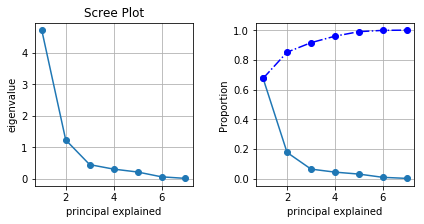

In [171]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(6.8,3)
fig.subplots_adjust(wspace=0.4)

ax1.plot(range(1,8),live_var['Eigenvalue'],'o-')
ax1.set_title('Scree Plot')
ax1.set_xlabel('principal explained')
ax1.set_ylabel('eigenvalue')
ax1.grid()

ax2.plot(range(1,8),live_var['Proportion'],'o-')
ax2.plot(range(1,8),live_var['Cumulative'],'bo-.')
ax2.set_xlabel('principal explained')
ax2.set_ylabel('Proportion')
ax2.grid()
plt.show()

In [172]:
live_eigenvectors=pd.DataFrame(live_pcal.Wt,index=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7'],  #wt属性可以给出基于原始特征根计算的对应特征向量
                              columns=(live.columns)[1:8].T)
live_eigenvectors

,GDP,Income,Consumption,Employment,Education,Health,Life
Prin1,-0.441618,-0.447192,-0.435590,-0.122961,-0.365034,-0.374018,-0.356365
Prin2,0.073883,-0.029164,-0.016302,0.827743,-0.397744,0.307351,-0.235799
Prin3,-0.083499,0.193227,0.394963,-0.098366,0.255464,0.001732,-0.851325
Prin4,0.153700,0.036980,0.035468,0.463616,0.336966,-0.801352,0.055691
Prin5,-0.325047,-0.358861,-0.276029,0.231263,0.718524,0.345642,0.011964
Prin6,0.796130,-0.213764,-0.450039,-0.143879,0.101607,0.062374,-0.288153
Prin7,0.171583,-0.765499,0.611568,-0.030374,-0.056051,-0.010942,0.079822


In [173]:
live.iloc[20:21,:]
live_pcal.Y[20]

array([ 1.50330439,  0.60019111,  0.55010765,  0.32100101,  0.40545839,
       -0.01128084, -0.03155784])

In [174]:
live_pcal.project([7477,8086.82,6529.2,0.2496,505.9,492.23,67.47])

array([ 1.50330439,  0.60019111,  0.55010765,  0.32100101,  0.40545839,
       -0.01128084, -0.03155784])

 完成主成分分析，能够得到和SAS、SPSS等常用统计分析软件一直的结果

In [175]:
def PCA(x,components=None):
    if components==None:
        components=x.size/len(x)
    average=np.mean(x,axis=0)
    sigma=np.std(x,axis=0,ddof=1)
    r,c=np.shape(x)
    dara_standardized=[]
    mu=np.tile(average,(r,1))
    data_standardized=(x-mu)/sigma
    cov_matrix=np.cov(data_standardized.T)
    EigenValue,EigenVector=np.linalg.eig(cov_matrix)
    index=np.argsort(-EigenValue)
    Score=[]
    Selected_Vector=EigenVector.T[index[:components]]
    Score=data_standardized*np.matrix(Selected_Vector.T)
    return EigenValue[index],Selected_Vector,np.array(Score)

In [176]:
EigenValue,Vector,Score=PCA(np.asarray(X))
live_ev=pd.DataFrame((EigenValue),columns=['Eigenvalue'],index=list(range(1,15)))
prop=live_ev['Eigenvalue']/live_ev['Eigenvalue'].sum()
s=0
p,c=[],[]
for i in range(1,len(prop)+1):
    s+=prop[i]
    p.append(prop[i])
    c.append(s)
live_ev['Proportion']=p
live_ev['Cumulative']=c
live_ev

,Eigenvalue,Proportion,Cumulative
1,7.953348,0.568096,0.568096
2,2.443283,0.174520,0.742617
3,0.785253,0.056090,0.798706
4,0.652081,0.046577,0.845283
5,0.495501,0.035393,0.880676
6,0.427167,0.030512,0.911188
7,0.332092,0.023721,0.934909
8,0.243358,0.017383,0.952292
9,0.182532,0.013038,0.965330
10,0.143056,0.010218,0.975548


In [178]:
fig,ax=plt.subplots(1)
ax.plot(live_S['prin1_Score'],live_S['prin2_Score'],'o')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.axvline(live_S['prin1_Score'].mean(),color='k',ls='--')
ax.axhline(live_S['prin2_Score'].mean(),color='k',ls='--')
dotxy=tuple(zip(live_S['prin1_Score']-0.2,live_S['prin2_Score']+0.15))
i=-1
for dot in dotxy:
    i+=1
    ax.annotate(live_S.ix[i]['District'],xy=dot)

## 11.3 因子分析

因子分析是主成份分析的推广发展，也是多元统计分析中降维分析的一种方法

In [179]:
path="D:/data/Python_data/ch11/internet_cafe.csv"
ic=pd.read_csv(path)
ic.head()

,No,Switch,Connection,Speed,Transformation,Offline,Timeliness,Initiative,Attitude,Skill,Consideration,Standard,Settlement,Success,Efficiency
0,24,8,8,8,8,8,1,1,2,2,2,2,2,2,2
1,14,3,10,4,3,2,7,1,10,6,9,6,5,6,5
2,40,7,6,5,6,6,6,6,6,6,5,5,6,5,5
3,25,4,5,2,4,6,5,5,8,5,5,2,4,6,5
4,64,3,5,3,3,3,5,8,5,9,8,8,8,5,6


In [180]:
X=ic.iloc[:,1:len(ic.columns)]  #构造一个由变量switch到efficiency组成的分析对象

In [181]:
from sklearn.decomposition import  FactorAnalysis as skFA
x1=(X-X.mean())/X.std(ddof=1)  #对数据进行标准化
ic_fa=skFA(n_components=2).fit(x1)

In [182]:
ic_ev=pd.DataFrame(ic_fa.components_,index=['Factor1','Factor2'],columns=(ic.columns)[1:len(ic.columns)]).T
ic_ev

,Factor1,Factor2
Switch,-0.582475,0.528556
Connection,-0.429028,0.454938
Speed,-0.485041,0.692095
Transformation,-0.597188,0.726102
Offline,-0.446861,0.350302
Timeliness,-0.774073,-0.195317
Initiative,-0.720337,-0.341741
Attitude,-0.800199,-0.191607
Skill,-0.877507,-0.134740
Consideration,-0.713259,-0.313348


In [183]:
EigenValue,Vector,Score=PCA(np.asarray(x1))  #展示特征根及其对应贡献
x1_ev=pd.DataFrame((EigenValue),columns=['EigenValue'],index=list(range(1,15)))
prop=x1_ev['EigenValue']/x1_ev['EigenValue'].sum()
s=0
p,c=[],[]
for i in range(1,len(prop)+1):
    s+=prop[i]
    p.append(prop[i])
    c.append(s)
x1_ev['Proportion']=p
x1_ev['Cumulative']=c
x1_ev

,EigenValue,Proportion,Cumulative
1,7.953348,0.568096,0.568096
2,2.443283,0.174520,0.742617
3,0.785253,0.056090,0.798706
4,0.652081,0.046577,0.845283
5,0.495501,0.035393,0.880676
6,0.427167,0.030512,0.911188
7,0.332092,0.023721,0.934909
8,0.243358,0.017383,0.952292
9,0.182532,0.013038,0.965330
10,0.143056,0.010218,0.975548


In [184]:
ic['Factor1']=ic_fa.transform(x1)[:,0]
ic['Factor1']=ic_fa.transform(x1)[:,1]

# 第十二章 列联分析与对应分析

## 12.1 列联分析

对于定类或者定序等定性数据的描述和分析，通常可以使用列联表进行分析

In [185]:
path="D:/data/Python_data/ch12/salary_reform.csv"
sc=pd.read_csv(path)
sc.head()

,department,attitude,ID
0,3,2,1
1,5,2,2
2,5,2,3
3,4,2,4
4,1,1,5


In [186]:
sc['department']=sc['department'].astype('category')  #变量标签
sc['department'].cat.categories=['发展战略部','客户服务部','市场部','研发中心','综合部']
sc['department'].cat.set_categories=['发展战略部','客户服务部','市场部','研发中心','综合部']

sc['attitude']=sc['attitude'].astype('category')
sc['attitude'].cat.categories=['支持','反对']
sc['attitude'].cat.set_categories=['支持','反对']

In [187]:
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)
    
sc_contingencytable=pd.crosstab(sc['attitude'],sc['department'],margins=True)
sc_contingencytable

department,发展战略部,客户服务部,市场部,研发中心,综合部,All
attitude,,,,,,
支持,16,21,23,22,22,104
反对,25,15,20,27,29,116
All,41,36,43,49,51,220


In [188]:
sc_contingencytable/sc_contingencytable.ix['All']['All']

department,发展战略部,客户服务部,市场部,研发中心,综合部,All
attitude,,,,,,
支持,0.072727,0.095455,0.104545,0.100000,0.100000,0.472727
反对,0.113636,0.068182,0.090909,0.122727,0.131818,0.527273
All,0.186364,0.163636,0.195455,0.222727,0.231818,1.000000


In [189]:
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)
    
def percent_observed(data):
    return data/data[-1]

pd.crosstab(sc['attitude'],sc['department'],margins=True).apply(percent_observed,axis=1)

department,发展战略部,客户服务部,市场部,研发中心,综合部,All
attitude,,,,,,
支持,0.153846,0.201923,0.221154,0.211538,0.211538,1.0
反对,0.215517,0.129310,0.172414,0.232759,0.250000,1.0
All,0.186364,0.163636,0.195455,0.222727,0.231818,1.0


In [190]:
pd.crosstab(sc['attitude'],sc['department'],margins=True).apply(percent_observed,axis=0)

department,发展战略部,客户服务部,市场部,研发中心,综合部,All
attitude,,,,,,
支持,0.390244,0.583333,0.534884,0.44898,0.431373,0.472727
反对,0.609756,0.416667,0.465116,0.55102,0.568627,0.527273
All,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [191]:
from scipy.stats import contingency  #scipy.stats.contingency 提供了expencted_freq方法可以直接计算列联表的期望值分布
pd.DataFrame(contingency.expected_freq(sc_contingencytable),columns=sc_contingencytable.columns,index=sc_contingencytable.index)

department,发展战略部,客户服务部,市场部,研发中心,综合部,All
attitude,,,,,,
支持,19.381818,17.018182,20.327273,23.163636,24.109091,104.0
反对,21.618182,18.981818,22.672727,25.836364,26.890909,116.0
All,41.000000,36.000000,43.000000,49.000000,51.000000,220.0


In [192]:
from random import randint
path="D:/data/Python_data/ch12/CellPhone.csv"
cp=pd.read_csv(path)
cp.ix[[randint(0,65) for _ in range(10)]]

,Element,Income,Count
63,11,4,10
26,5,3,9
34,6,5,9
46,8,5,12
40,7,5,8
50,9,3,26
54,10,1,626
48,9,1,90
45,8,4,20
39,7,4,5


In [193]:
import traceback
def transform_crosstbale(data):
    if data.shape[1]!=3:
        raise Exception('Program can only do ca with 2 variable data.')
    else:
        data=data
    n=sum(data.iloc[:,2])
    p=data.iloc[:,2]/float(n)
    v1_len=len(data.iloc[:,0].value_counts())
    v2_len=len(data.iloc[:,1].value_counts())
    v1_name=list(data.iloc[:,0].unique())
    v2_name=list(data.iloc[:,1].unique())
    cross_table=pd.DataFrame(columns=v1_name,index=v2_name) 
    cross_table_array=np.array(cross_table)
    for i in v2_name:
        i_index=v2_name.index(i)
        cross_table_array[i_index]=list(data[data.iloc[:,1]==v2_name[i_index]].iloc[:,2])
    cross_table_f=pd.DataFrame(cross_table_array,index=v2_name,columns=v1_name)
    
    total_r=[]
    total_c=[]
    for i in range(cross_table_f.shape[0]):
        total_r.append(sum(cross_table_f.loc[v2_name[i]]))
    for j in range(cross_table_f.shape[1]):
        total_c.append(sum(cross_table_f[v1_name[j]]))
        
    total=sum(total_r)
    total_r=pd.DataFrame(total_r)
    total_c=pd.DataFrame(total_c)
    return cross_table_f

In [194]:
cp=transform_crosstbale(cp)
cp

,1,2,3,4,5,6,7,8,9,10,11
1,658,374,528,332,50,104,143,363,90,626,52
2,665,406,522,323,36,86,165,387,110,637,46
3,139,108,119,76,9,24,46,93,26,147,19
4,26,19,26,13,8,10,5,20,16,27,10
5,13,10,14,11,9,9,8,12,13,15,12
6,13,14,11,6,11,15,7,11,6,18,7


# 第十三章 聚类

## 13.1 聚类的基本原理

In [195]:
import scipy.cluster.hierarchy as hc

In [196]:
path="D:/data/Python_data/ch13/mouse_cluster.csv"
mc=pd.read_csv(path)
mc.head()
z=hc.linkage(mc.ix[:,1:],method='average')
z

array([[ 2.        ,  3.        ,  0.70710678,  2.        ],
       [ 0.        ,  9.        ,  0.8660254 ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 8.        , 11.        ,  1.        ,  2.        ],
       [ 5.        , 16.        ,  1.32287566,  3.        ],
       [14.        , 15.        ,  1.43328552,  4.        ],
       [10.        , 17.        ,  1.55409255,  4.        ],
       [12.        , 18.        ,  1.64860349,  5.        ],
       [ 4.        , 19.        ,  2.28324551,  5.        ],
       [13.        , 20.        ,  2.48994247,  7.        ],
       [ 1.        , 22.        ,  2.81192434,  8.        ],
       [21.        , 23.        ,  3.34347471, 13.        ]])

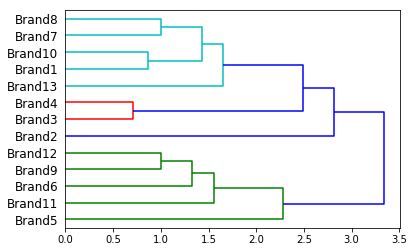

In [197]:
dd=hc.dendrogram(z,orientation='right',labels=list(mc.ix[:,0]))
#orientation 可以选top bottom left right分别表示对应方向的谱系图

In [198]:
hc.fcluster(z,2.6,criterion='distance')

array([2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2])

In [199]:
hc.fclusterdata(mc.ix[:,1:],2.6,criterion='distance',metric='euclidean',method='average')
#scipy层次聚类要求指定一个并类的终止条件，即并类阈值t，表示两个距离最近的类间距的最小距离

array([2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2])

In [200]:
from sklearn.cluster import AgglomerativeClustering as AC
cm=AC(n_clusters=3,linkage='average',affinity='euclidean')
cl=cm.fit(mc.ix[:,1:])
cl.labels_

array([0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

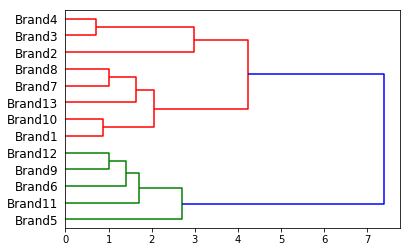

In [201]:
dd_ward=hc.dendrogram((hc.linkage(mc.ix[:,1:],method='ward')),orientation='right',labels=list(mc.ix[:,0]))

In [202]:
from scipy.cluster.vq import kmeans2
kmeans2(mc.ix[:,1:],3)  #k=3类

(array([[ 7.2  , 15.6  ,  6.3  ,  7.5  ,  7.3  ],
        [ 7.5  , 17.125,  7.625,  7.75 ,  7.75 ],
        [ 8.25 , 18.375,  8.125,  7.625,  9.125]]),
 array([1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1]))

In [203]:
from scipy.cluster.vq import kmeans,whiten
kmeans(whiten(mc.ix[:,1:]),3)

(array([[14.74663471, 13.59604435,  9.32232235, 16.44384383, 10.83166654],
        [12.78041675, 13.0993852 ,  8.40836918, 15.58739363,  9.21641802],
        [12.1343737 , 11.62182421,  6.90948598, 15.41610359,  8.3232806 ]]),
 1.2971252532629467)

In [204]:
from sklearn.cluster import KMeans
mc_km=KMeans(n_clusters=3).fit(mc.ix[:,1:])
mc_km.labels_

array([2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2])

In [205]:
cluster_by_Kmeans=pd.concat([mc['brand'],pd.DataFrame(mc_km.labels_,columns=['cluster'])],axis=1)
cluster_by_Kmeans.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
brand,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Brand13
cluster,2,0,0,0,1,1,2,2,1,2,1,1,2


In [206]:
mc_km.labels_

array([2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2])

In [207]:
from sklearn.cluster import DBSCAN
mc_DB=DBSCAN(eps=1.5,min_samples=1).fit(mc.ix[:,1:])
cluster_by_DBSCAN=pd.concat([mc['brand'],pd.DataFrame(mc_DB.labels_,columns=['cluster'])],axis=1)
cluster_by_DBSCAN.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
brand,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Brand13
cluster,0,1,0,0,2,3,0,0,3,0,3,3,0


# 第十四章 判别和分类

## 14.2常用判别方法和分类算法

In [208]:
path="D:/data/Python_data/ch14/mouse_discrim.csv"
mouse_d=pd.read_csv(path)
mouse_d

,Brand,Touch,Chips,Driver,Compatibility,Game,Type
0,Brand1,7.5,17.5,7.0,8.0,8.0,A
1,Brand2,7.5,19.5,7.0,7.0,9.0,B
2,Brand3,8.5,18.0,8.5,8.0,9.5,B
3,Brand4,9.0,18.5,8.5,8.0,9.5,B
4,Brand5,7.0,14.0,6.5,7.0,7.5,C
5,Brand6,7.0,16.0,6.5,7.5,8.0,C
6,Brand7,7.5,17.0,8.0,7.5,8.0,A
7,Brand8,8.0,17.5,8.5,7.5,8.5,A
8,Brand9,7.0,16.5,6.0,8.0,7.0,C
9,Brand10,7.5,17.0,7.5,8.5,8.0,A


In [209]:
def getminindex(lis):
    lis_copy=lis[:]
    lis_copy.sort()
    minvalue=lis_copy[0]
    minindex=lis.index(minvalue)
    return minindex

In [210]:
from sklearn.preprocessing import scale
from scipy.spatial.distance import mahalanobis

def mahalanobis_discrim(x_test,x_train,train_label):
    final_result=[]
    colname=x_train.columns
    test_n=x_test.shape[0]
    train_n=x_train.shape[0]
    m=x_train.shape[1]
    n=test_n+train_n
    data_x=x_train.append(x_test)
    data_x_scale=scale(data_x)
    x_train_scale=pd.DataFrame(data_x_scale[:train_n])
    x_test_scale=pd.DataFrame(data_x_scale[train_n:])
    data_train=x_train_scale.join(train_label)
    label_name=data_train.columns[-1]
    miu=data_train.groupby(label_name).mean()
    miu=np.array(miu)
    print "类中心"
    print pd.DataFrame(miu)
    print
    label=train_label.drop_duplicates()
    label=label.iloc[:,0]
    label=list(label)
    label_len=len(label)
    x_test_array=np.array(x_test_scale)
    x_train_array=np.array(x_train_scale)
    data_x_scale_array=np.array(data_x_scale)
    cov=np.cov(data_x_scale_array.T)
    for i in range(n):
        dist=[]
        for j in range(label_len):
            d=float(mahalanobis(data_x_scale[i],miu[j],np.mat(cov).I))
            dist.append(d)
        min_dist_index=getminindex(dist)
        result=label[min_dist_index]
        final_result.append(result)
    print "分类结果"
    return final_result

In [211]:
X_train=mouse_d.iloc[0:13,1:6]
X_test=mouse_d.iloc[13:15,1:6]
Y_train=mouse_d.iloc[0:13,1:6]

In [212]:
Y_test=mouse_d.iloc[13:15,6:7]
X=mouse_d.iloc[0:15,1:6]

### 14.2.3 k-近邻

In [213]:
path="D:/data/Python_data/ch14/iris.csv"
iris=pd.read_csv(path)
iris.ix[[1,51,101]]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,4.9,3.0,1.4,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
101,5.8,2.7,5.1,1.9,virginica


In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
x=iris.iloc[:,0:4]
y=iris.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
iris_knn=KNeighborsClassifier(algorithm='kd_tree')
iris_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [215]:
answer=iris_knn.predict(x)
answer_array=np.array([y,answer])
answer_mat=np.matrix(answer_array).T
result=pd.DataFrame(answer_mat)
result.columns=["真实类别","预测类别"]
result.ix[[1,51,101]]

,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [216]:
from sklearn.metrics import classification_report
print "KNN算法对测试集数据判别结果："
print classification_report(y_test,iris_knn.predict(x_test))
print 53*"-"
print "KNN算法对全部数据判别结果："
print classification_report(y,iris_knn.predict(x))

In [217]:
scores=cross_val_score(iris_knn,x,y,cv=5)
cross=pd.DataFrame(scores)
cross.columns=['5折交叉验证结果']
cross.T

,0,1,2,3,4
5折交叉验证结果,0.966667,1.0,0.933333,0.966667,1.0


### 14.2.4 决策树

In [218]:
from sklearn.tree import DecisionTreeClassifier

iris_tree=DecisionTreeClassifier(criterion='entropy')
iris_tree.fit(x_train,y_train)
answer=iris_tree.predict(x)
amswer_array=np.array([y,answer])
answer_mat=np.matrix(answer_array).T
result=pd.DataFrame(answer_mat)
result.columns=["真实类别","预测类别"]
result.ix[[1,5,101]]

,真实类别,预测类别
1,setosa,setosa
5,setosa,setosa
101,virginica,virginica


### 14.2.5 随机森林

In [219]:
from sklearn.ensemble import RandomForestClassifier
iris_rf=RandomForestClassifier(n_estimators=100)
iris_rf.fit(x_train,y_train)
answer=iris_rf.predict(x)
answer_array=np.array([y,answer])
answer_mat=np.matrix(answer_array).T
result=pd.DataFrame(answer_mat)
result.columns=["真实类别","预测类别"]
result.ix[[1,51,101]]

,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [220]:
print "随机森林对测试集数据判别结果："
print classification_report(y_test,iris_rf.predict(x_test))
print 53*"-"
print "随机森林对全部数据判别结果"
print classification_report(y,iris_rf.predict(x))

In [221]:
scores=cross_val_score(iris_rf,x,y,cv=5)
cross=pd.DataFrame(scores)
cross.columns=['5折交叉验证结果']
cross.T

,0,1,2,3,4
5折交叉验证结果,0.966667,0.966667,0.933333,0.966667,1.0


### 14.2.6 支持向量机

In [222]:
from sklearn import svm
iris_svm=svm.SVC()
iris_svm.fit(x_train,y_train)
answer=iris_svm.predict(x)
answer_array=np.array([y,answer])
answer_mat=np.matrix(answer_mat)
result.columns=["真实类别","预测类别"]
result.ix[[1,51,101]]


,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [223]:
print "SVN对测试集数据判别结果："
print classification_report(y_test,iris_svm.predict(x_test))
print 53*"-"
print "SVN对全部数据判别结果："
print classification_report(y,iris_svm.predict(x))

# 第十五章 时间序列分析

## 15.1 时间序列的基本问题

In [224]:
path="D:/data/Python_data/ch15/sales_monthly.sas7bdat"
sales=pd.read_sas(path)
sales.head()

,DATE,Month,Sales
0,2001-01-01,2001Jan,814.0
1,2001-02-01,2001Feb,774.8
2,2001-03-01,2001Mar,782.8
3,2001-04-01,2001Apr,772.0
4,2001-05-01,2001May,817.6


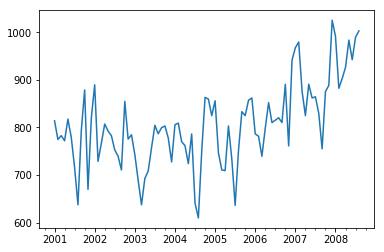

In [225]:
sales.index=pd.Index(pd.date_range('1/2001','9/2008',freq='1M'))
#设置日期索引
sales['Sales'].plot()

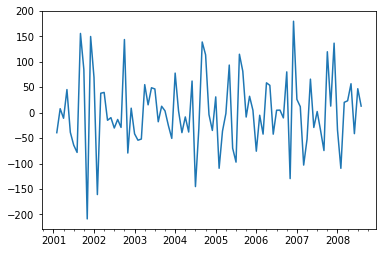

In [226]:
sales['Sales'].diff(1).plot()  #diff方法表示按照给定阶数进行差分

In [227]:
from statsmodels.tsa.stattools import acf,pacf
ts_d1_ACF=pd.DataFrame(acf(sales['Sales'].diff(1).ix[1:92]),columns=['ACF'])
ts_d1_ACF['PACF']=pd.DataFrame(pacf(sales['Sales'].diff(1).ix[1:92]))
ts_d1_ACF.head(10).T

,0,1,2,3,4,5,6,7,8,9
ACF,1.0,-0.213246,-0.267816,0.045357,-0.019005,-0.042911,-0.099197,0.131948,-0.020434,-0.047949
PACF,1.0,-0.215615,-0.335942,-0.123429,-0.159380,-0.141271,-0.262224,-0.048721,-0.154343,-0.126597


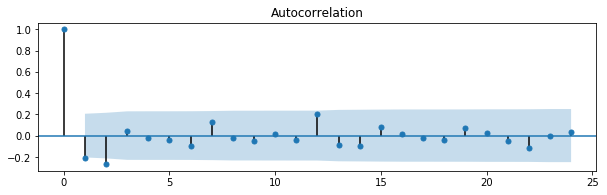

In [228]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(sales['Sales'].diff(1).ix[1:92],lags=24,ax=ax1)


In [229]:
r,q,p=sm.tsa.acf(sales['Sales'].diff(1).ix[1:92].values.squeeze(),qstat=True)
mat=np.c_[range(1,41),r[1:],q,p]
table=pd.DataFrame(mat,columns=['lag','AC','Q','Prob(>Q)'])
LB_result=table.loc[[5,11,17]]
LB_result.set_index('lag',inplace=True)
print LB_result

In [230]:
from statsmodels.tsa.stattools import adfuller
def DFTest(sales,regression,maxlag,autolag='AIC'):
    print "ADF-Test Result"
    dftest=adfuller(sales,regression=regression,maxlag=maxlag,autolag=autolag)
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','nobs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value at %s' %key]=value
    print dfoutput
    
DFTest (sales['Sales'],regression='nc',maxlag=6,autolag='AIC')
print 37*'-'
DFTest(sales['Sales'].diff(1).ix[1:92],regression='nc',maxlag=5,autolag='AIC')
#对原始数据的一阶差分数据进行单位根检验

## 15.2 ARIMA模型的分析过程

#### 1 利用自相关系数图、偏自相相关系数图进行模型识别

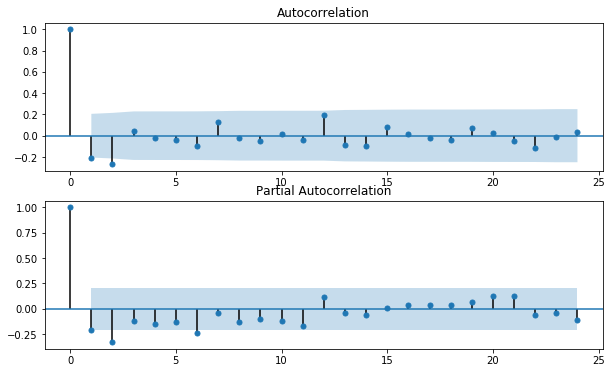

In [231]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(sales['Sales'].diff(1).ix[1:92].dropna(),lags=24,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(sales['Sales'].diff(1).ix[1:92].dropna(),lags=24,ax=ax2)

#### 2 利用最小信息准则进行模型识别

In [232]:
order_p,order_q,bic=[],[],[]
model_order=pd.DataFrame()
for p in range(4):
    for q in range(4):
        arma_model=sm.tsa.ARMA(sales['Sales'].diff(1).ix[1:92].dropna(),(p,q)).fit()
        order_p.append(p)
        order_q.append(q)
        bic.append(arma_model.bic)
        print 'The BIC of ARMA(%s,%s) is %s' %(p,q,arma_model.bic)
        
model_order['p']=order_p
model_order['q']=order_q
model_order['BIC']=bic
P=list(model_order['p'][model_order['BIC']==model_order['BIC'].min()])
Q=list(model_order['q'][model_order['BIC']==model_order['BIC'].min()])
print '\nThe best model is ARMA(%s,%s)' %(P[0],Q[0])

In [233]:
model=sm.tsa.ARMA(sales['Sales'].diff(1).ix[1:92].dropna(),(0,2)).fit(method='css')
params=model.params
tvalues=model.tvalues  #t统计量
pvalues=model.pvalues  #p值
result_mat=pd.DataFrame({'Estimate':params,'t-values':tvalues,'pvalues':pvalues})
result_mat

,Estimate,pvalues,t-values
const,1.725814,0.174759,1.368116
ma.L1.Sales,-0.436521,0.000041,-4.320340
ma.L2.Sales,-0.382629,0.000204,-3.875838


In [234]:
print 'AIC:',model.aic
print 'Variance Estimates:',model.sigma2

In [235]:
resid=model.resid
r,q,p=sm.tsa.acf(resid.values.squeeze(),qstat=True)
mat_res=np.c_[range(1,41),r[1:],q,p]
table_res=pd.DataFrame(mat_res,columns=['to lag','AC','Q','Prob(>Q)'])
LB_result_res=table_res.loc[[5,11,17,23]]
LB_result_res.set_index('to lag',inplace=True)
print '残差白噪声检验结果'
print LB_result_res

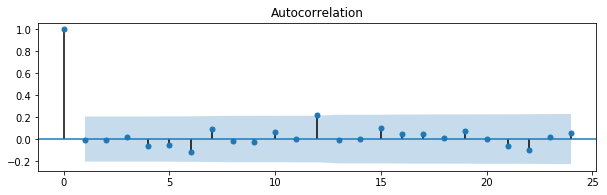

In [236]:
fig=plt.figure(figsize=(10,6))
ax3=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resid,lags=24,ax=ax3)

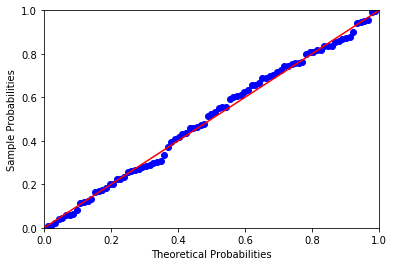

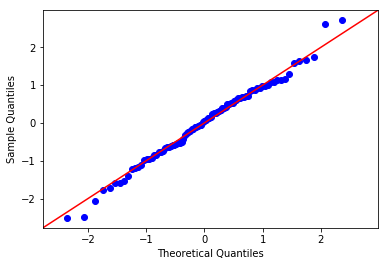

In [237]:
from scipy import stats
sm.ProbPlot(resid,stats.t,fit=True).ppplot(line='45')
sm.ProbPlot(resid,stats.t,fit=True).qqplot(line='45')
plt.show()

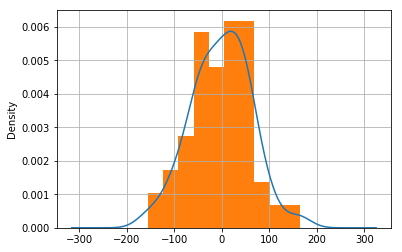

In [238]:
plt.figure()
x=pd.Series(resid)
p1=x.plot(kind='kde')
p2=x.hist(normed=True)
plt.grid(True)
plt.show()

In [239]:
arma_model.forecast(steps=4)

(array([-46.88275913,  -1.17370097,  -5.30952486, -12.61995529]),
 array([61.95815693, 69.2913763 , 70.52524153, 70.71368782]),
 array([[-168.31851526,   74.55299699],
        [-136.98230296,  134.63490102],
        [-143.53645827,  132.91740855],
        [-151.21623663,  125.97632605]]))

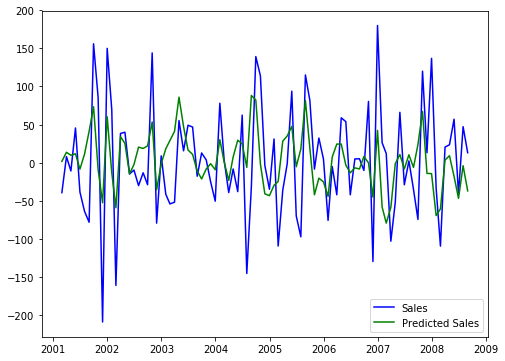

In [240]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(sales['Sales'].diff(1).ix[1:92],color='blue',label='Sales')
ax.plot(arma_model.fittedvalues,color='green',label='Predicted Sales')
plt.legend(loc='lower right')